
# Machine Learning for Robot Navigation Classification using Ultrasound Sensor Data

In [21]:
# Importing the libraries needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [22]:
raw_data=pd.read_csv('sensor_readings_24.csv')

In [23]:
raw_data

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,label
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [24]:
raw_data.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,label
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


In [25]:
# Describe the dataset
raw_data.describe()
# from the nature of the data, it can be seen that we don't need to normalize it.

,a,b,c,d,e,f,g,h,i,j,...,o,p,q,r,s,t,u,v,w,x
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [59]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5456 non-null   float64
 1   b       5456 non-null   float64
 2   c       5456 non-null   float64
 3   d       5456 non-null   float64
 4   e       5456 non-null   float64
 5   f       5456 non-null   float64
 6   g       5456 non-null   float64
 7   h       5456 non-null   float64
 8   i       5456 non-null   float64
 9   j       5456 non-null   float64
 10  k       5456 non-null   float64
 11  l       5456 non-null   float64
 12  m       5456 non-null   float64
 13  n       5456 non-null   float64
 14  o       5456 non-null   float64
 15  p       5456 non-null   float64
 16  q       5456 non-null   float64
 17  r       5456 non-null   float64
 18  s       5456 non-null   float64
 19  t       5456 non-null   float64
 20  u       5456 non-null   float64
 21  v       5456 non-null   float64
 22  

In [62]:
#checking null values

In [26]:
raw_data.isnull().sum()

a        0
b        0
c        0
d        0
e        0
f        0
g        0
h        0
i        0
j        0
k        0
l        0
m        0
n        0
o        0
p        0
q        0
r        0
s        0
t        0
u        0
v        0
w        0
x        0
label    0
dtype: int64

In [64]:
#Defining  x and y

In [27]:
x=raw_data.drop('label',axis=1)
y=raw_data['label']

In [28]:
# encoding the label set with a label encoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([3, 3, 3, ..., 1, 0, 1])

Text(0.5, 1.0, 'countplot for direction column')

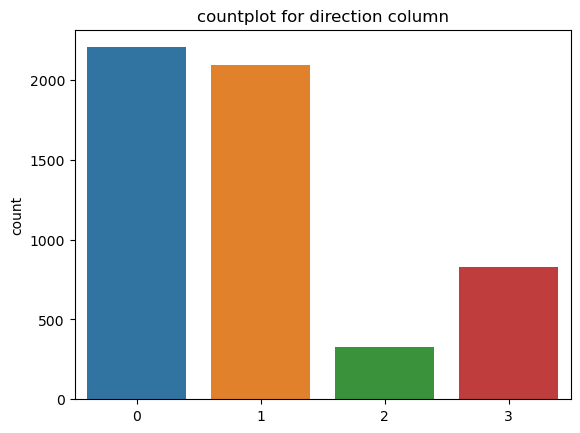

In [29]:
sns.countplot(x=y)
plt.title('countplot for direction column')

In [30]:
#Applying Standard scalar
scaler = StandardScaler()
scalled_set = scaler.fit_transform(x)

In [31]:
# Splitting the data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=False)
X_train.shape

(3819, 24)

In [32]:
X_test.shape

(1637, 24)

In [71]:
#building an ai model

# LogisticRegression

In [33]:
# defining the model

lg_model = LogisticRegression(C= 86, solver='liblinear', max_iter = 1000, multi_class = 'auto', random_state = 0)# class_weight= label_weights)

# commence training -
lg_model.fit(X_train, y_train)

# predict the result
y_pred = lg_model.predict(X_test)
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")


Performance - 68.41783750763591%


In [34]:
cm=confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[413, 216,   7,  34],
       [ 50, 527,   9,  31],
       [ 16,  38,  53,   0],
       [ 44,  69,   3, 127]], dtype=int64)

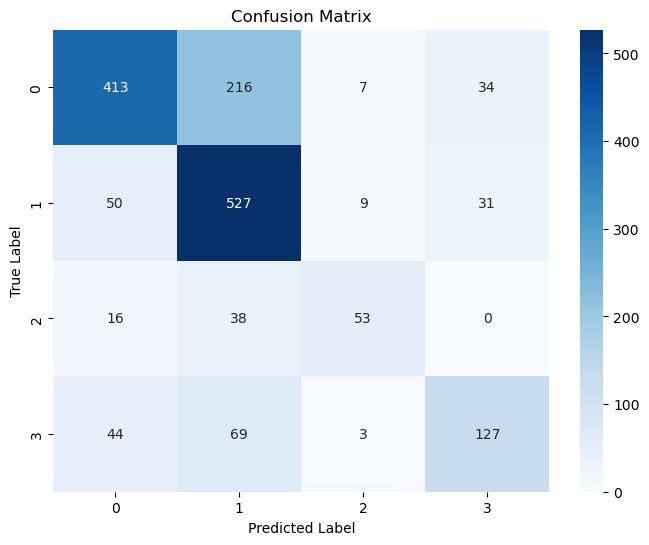

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")#, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [36]:
report=classification_report(y_test,y_pred)

In [37]:
print('LogisticRegression classification_report\n',report)

LogisticRegression classification_report
               precision    recall  f1-score   support

           0       0.79      0.62      0.69       670
           1       0.62      0.85      0.72       617
           2       0.74      0.50      0.59       107
           3       0.66      0.52      0.58       243

    accuracy                           0.68      1637
   macro avg       0.70      0.62      0.65      1637
weighted avg       0.70      0.68      0.68      1637



# MLP Classifier

In [ ]:
# Creates the MLP Classifier


# After training with Cross validation, this was derived as the best model.
mlp = MLPClassifier(activation= 'logistic',max_iter=1000)
# commence training -
mlp.fit(X_train, y_train)

# predict the result
y_pred1 = mlp.predict(X_test)
y_pred1

In [ ]:
print ("Performance - " + str(100*accuracy_score(y_pred1, y_test)) + "%")


In [19]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

NameError: name 'y_test' is not defined

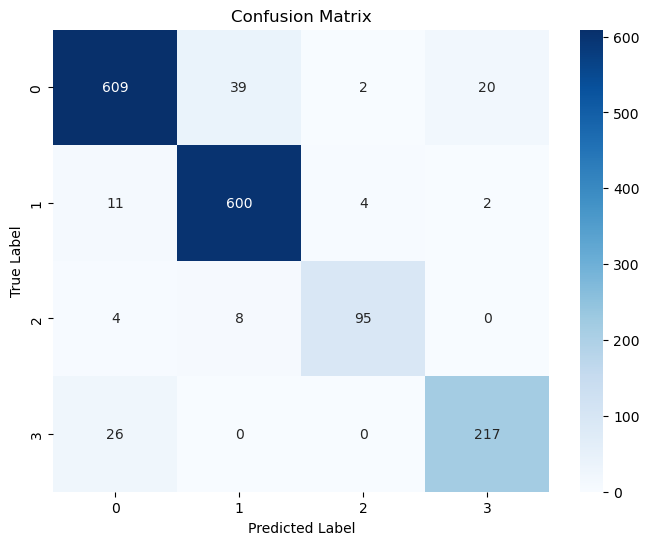

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")#, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
report1=classification_report(y_test,y_pred1)
print('classification_report MLP Classifier\n',report1)

NameError: name 'y_test' is not defined

In [79]:
#save the model